In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(X_Train,Y_Train),(X_Test,Y_Test) = mnist.load_data()

In [3]:
X_Train.shape

(60000, 28, 28)

In [4]:
X_Test.shape

(10000, 28, 28)

In [5]:
X_Train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
Y_Train[10]

3

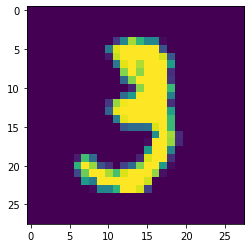

In [7]:
plt.imshow(X_Train[10])

In [0]:
X_Train = X_Train.reshape(60000,28,28,1)
X_Test  = X_Test.reshape(10000,28,28,1)

In [9]:
#1-Hot Encoding

y_train_oneh = to_categorical(Y_Train)
y_test_oneh  = to_categorical(Y_Test)

print(y_train_oneh[10]) # Should be equivalent to the value we saw above

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
digit_model = Sequential()
digit_model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
digit_model.add(Conv2D(32,kernel_size=3,activation='relu'))
digit_model.add(Flatten())
digit_model.add(Dense(10,activation='softmax'))

In [0]:
digit_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = digit_model.fit(X_Train,y_train_oneh, validation_data=(X_Test,y_test_oneh),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2555 - accuracy: 0.9501 - val_loss: 0.1103 - val_accuracy: 0.9694
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9786 - val_loss: 0.0817 - val_accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0476 - accuracy: 0.9844 - val_loss: 0.0862 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.1039 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0870 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.1156 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.1093 - val_accuracy:

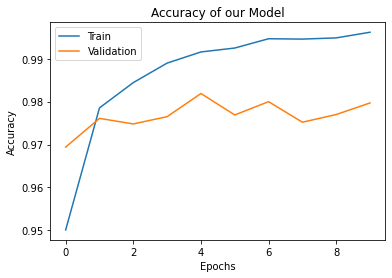

In [13]:
#Plot the Training and Validation Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy of our Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [14]:
# Comparing with some data from the training set

predictions = digit_model.predict(X_Test[100:110])
print(np.argmax(predictions,axis=1))

print(Y_Test[100:110])

[6 0 5 4 9 9 2 1 9 4]
[6 0 5 4 9 9 2 1 9 4]
